## Reformat songs and organize by strain, then save in .mat file for BB

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_plot

cc = np.concatenate

FPS = 30.03
DT = 1/FPS

C_SONG_FBHV_FILE = 'data/simple/c_song_f_behav.csv'
W_SONG_FBHV_FILE = 'data/simple/w_song_f_behav.csv'

STRAIN_FILE = 'data/simple/strains.csv'

In [2]:
df_c = pd.read_csv(C_SONG_FBHV_FILE)
ntr_c = np.max(df_c.ID) + 1

dfs_tr = [df_c[df_c.ID == i] for i in range(ntr_c)]

df_w = pd.read_csv(W_SONG_FBHV_FILE)
ntr_w = np.max(df_w.ID) + 1

dfs_tr.extend([df_w[df_w.ID == i] for i in range(ntr_w)])

df_strain = pd.read_csv(STRAIN_FILE)
strains = np.array(df_strain['STRAIN'])
strains_unique = list(np.unique(strains))
print(strains_unique)

['CM07', 'CSTul', 'CarM03', 'N30', 'NM91', 'WTG', 'ZH23', 'ZW109']


In [3]:
df_strain

,ID,STRAIN
0,0,NM91
1,1,NM91
2,2,NM91
3,3,NM91
4,4,NM91
...,...,...
355,355,WTG
356,356,WTG
357,357,WTG
358,358,WTG


In [4]:
df_c

,ID,FRAME,T,Q,S,P,F,FFV,FFA,FLS,FRS,FMFV,FMLS
0,0,0,0.000000,1,0,0,0,0.231,0.0000,0.159,0.077,-0.058526,0.274257
1,0,1,0.033300,1,0,0,0,0.314,0.0385,0.025,0.044,0.100623,0.298490
2,0,2,0.066600,1,0,0,0,0.308,0.0025,0.029,0.011,0.147629,0.271865
3,0,3,0.099900,1,0,0,0,0.319,0.0020,0.016,0.016,0.091174,0.306112
4,0,4,0.133200,1,0,0,0,0.312,-0.0315,0.030,0.002,0.065871,0.306439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978565,275,27100,902.430902,1,0,0,0,0.217,0.0280,0.029,0.058,-0.171418,0.136184
4978566,275,27101,902.464202,1,0,0,0,0.210,-0.1045,0.138,0.322,0.032522,0.249171
4978567,275,27102,902.497502,1,0,0,0,0.008,-0.0910,0.034,0.260,0.033202,0.010844
4978568,275,27103,902.530803,1,0,0,0,0.028,0.0695,0.010,0.090,0.012059,0.027177


# Simplify CSVs

In [5]:
df_strain_simple = df_strain[df_strain.ID < 276]
df_strain_simple.to_csv('data/20230223_for_bb/strains.csv', index=False)

In [6]:
songs_all = np.zeros(len(df_c), dtype=int)
songs_all[np.array(df_c['Q']) == 1] = 0
songs_all[np.array(df_c['S']) == 1] = 1
songs_all[np.array(df_c['P']) == 1] = 2
songs_all[np.array(df_c['F']) == 1] = 3
df_songs_simple = df_c[['ID', 'T']]
df_songs_simple['SONG'] = songs_all
df_songs_simple.to_csv('data/20230223_for_bb/songs.csv', index=False)

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Plot example songs to compare w MATLAB format

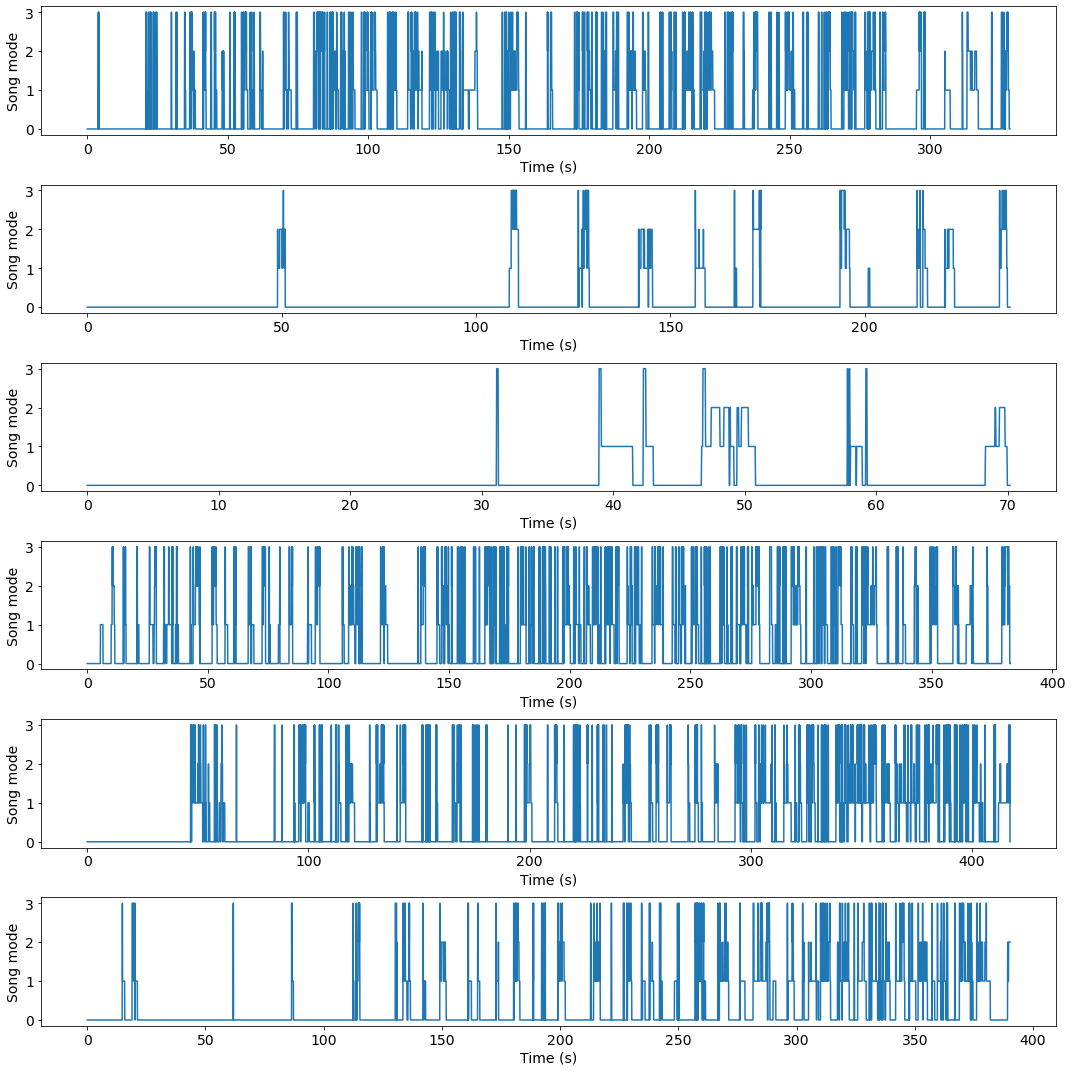

In [8]:
fig, axs = plt.subplots(6, 1, figsize=(15, 15), tight_layout=True)
for tr_id, ax in enumerate(axs):
    time_vec = df_songs_simple[df_songs_simple['ID'] == tr_id]['T']
    song = df_songs_simple[df_songs_simple['ID'] == tr_id]['SONG']
    ax.plot(time_vec, song)
    
    set_plot(ax, x_label='Time (s)', y_label='Song mode', font_size=14)